In [431]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms import bipartite

url= pd.read_csv('https://raw.githubusercontent.com/greggmaloy/Data620/main/DATA_620_Assignment_1.csv')
url.head(5)

# remove duplicates
# some member names were first name only or were 'none' 
df = data[~data.duplicated(keep=False)]


df1 = pd.DataFrame({'Organisation': df['Organisation'], 'Count': 1})
grouped = df1.groupby(['Organisation'])['Count'].count()
print(grouped)

merged_df = df.merge(grouped, on='Organisation', how='left')
print(merged_df)
#tesing data- for each node there is at least one edge
#print(nx.is_connected(G))

#Returns True if graph G is bipartite, False if not.
#print(nx.is_bipartite(G))

Organisation
Azure           1616
NVIDIA            12
airbnb            26
ansible           47
apache          1070
atom              45
aws              168
babel             70
bitcoin           28
deepmind          19
django            62
docker            18
elastic          169
ethereum          73
facebook         107
firebase          38
flutter           66
freeCodeCamp      74
golang            60
google           802
grafana           62
graphql           17
huggingface       45
jquery            65
laravel           11
microsoft       3898
mongodb           55
nodejs           363
nuxt               7
opencv            10
plotly            11
prometheus        26
python           119
pytorch           47
rails             65
reactjs          138
redis              5
reduxjs            6
serverless        38
udacity            5
vuejs             51
Name: Count, dtype: int64
     Organisation                 member  Count
0        ethereum          Oleh Aldekein     73
1   

In [432]:
len(request)

234037

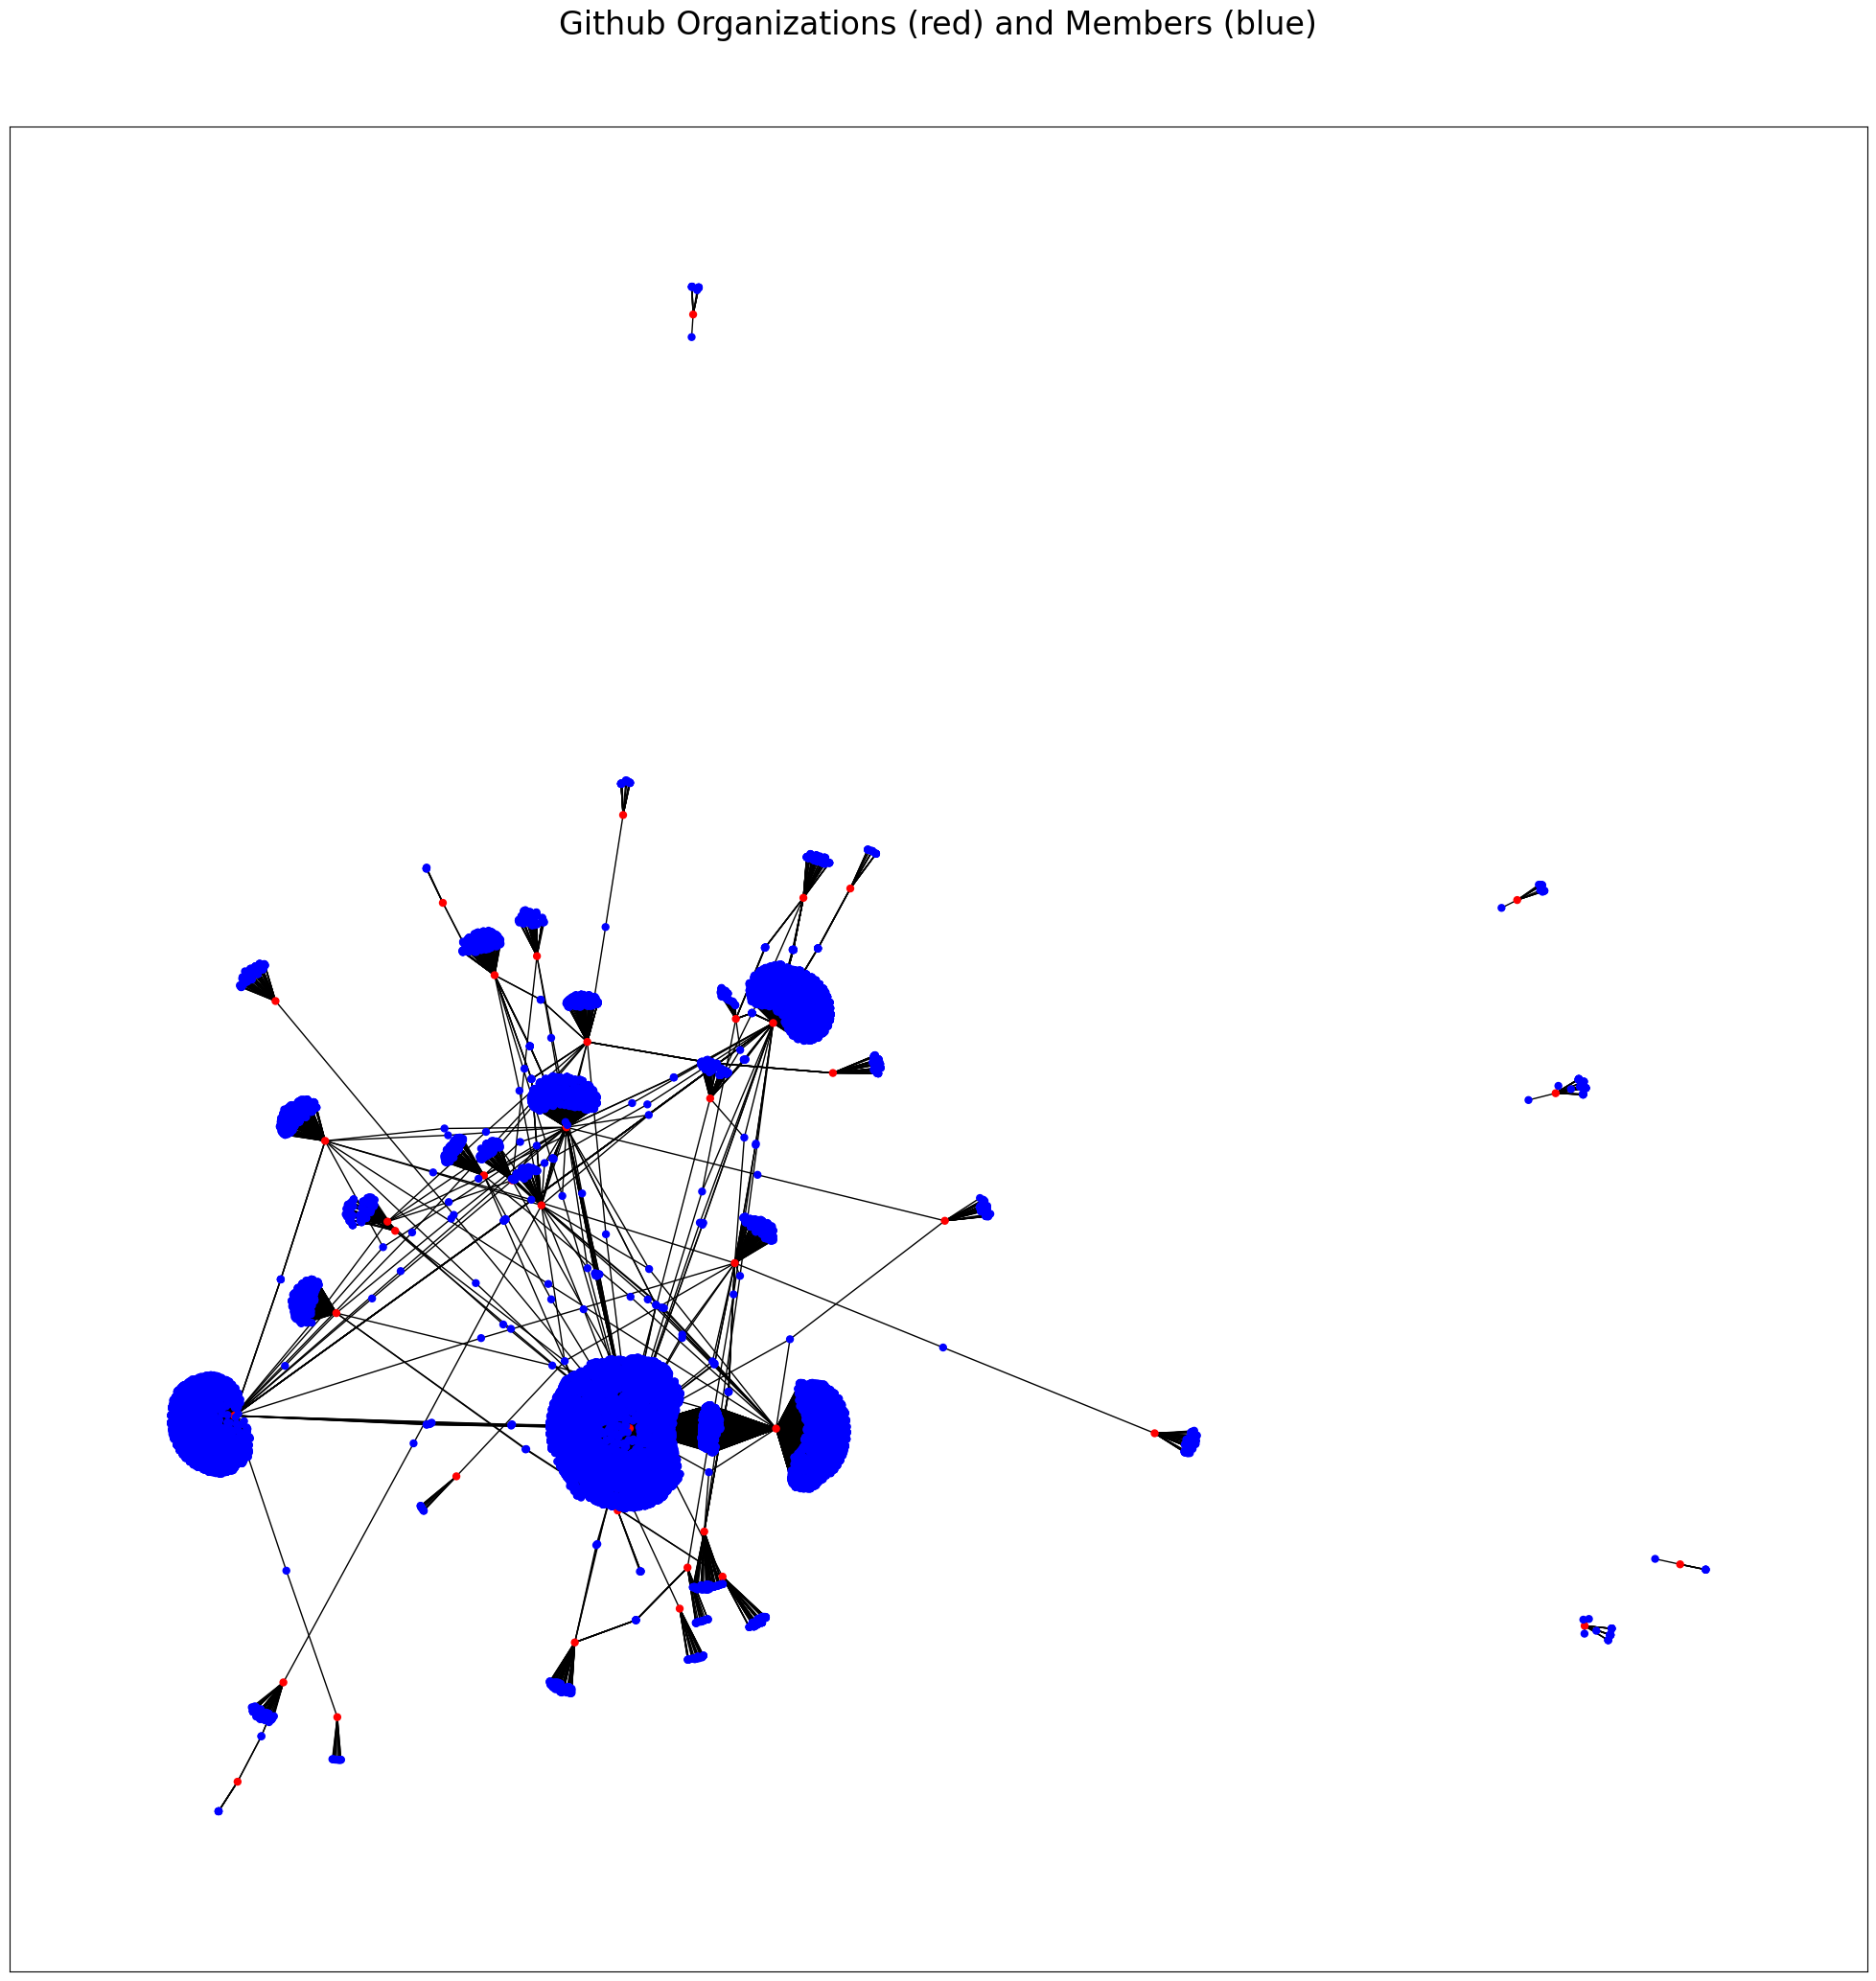

In [433]:

    
plt.show()
graph.add_nodes_from(merged_df['member']      ,bipartite=1, with_labels=False)
graph.add_nodes_from(merged_df['Organisation'],bipartite=0, with_labels=False)
node_colors = ['blue' if node_type == 1 else 'red' for node_type in nx.get_node_attributes(graph, 'bipartite').values()]

for i in range(len(df)):
  graph.add_edges_from([(df.iloc[i,1],df.iloc[i,0])])

plt.figure(figsize=(25,25))
plt.text(0.5, 1.05, "Github Organizations (red) and Members (blue)", fontsize=24, ha='center', transform=plt.gca().transAxes)
nx.draw_networkx(graph, with_labels=False, node_size=25,node_color=node_colors)
plt.show()

In [434]:


duplicates = merged_df.duplicated()

if duplicates.any():
    print("Duplicate rows exist in the DataFrame.")
else:
    print("No duplicate rows found in the DataFrame.")

    
#tesing data- for each node there is at least one edge
print(nx.is_connected(graph))

#Returns True if graph G is bipartite, False if not.
print(nx.is_bipartite(graph))    
    
#print(graph)
#print("Biadjacency matrix")
#print(bipartite.biadjacency_matrix(graph, df['member'], df['Organisation']))

No duplicate rows found in the DataFrame.
False
True


In [435]:
#df.to_csv('data.csv')
# Get the isolated nodes
#isolated_nodes = [node for node in graph.nodes() if graph.degree(node) == 0]

# Print the number of isolated nodes
#print("Number of nodes with no edges:", len(isolated_nodes))

In [436]:
print(graph)
graph
list(graph.nodes)

Graph with 8904 nodes and 9614 edges


['acud',
 'becca',
 'Ev',
 'franzihei',
 'sacha',
 'Hugo',
 'busyforking',
 'kumavis',
 'Leo',
 'ligi',
 'Maran',
 'tintin',
 'Wesley',
 'Lin',
 'Jessica',
 'nateanl',
 'Zafar',
 'Patrick',
 'None',
 'Feiyang',
 'Ilja',
 'makuchaku',
 'BeMacized',
 'ColdPaleLight',
 'Andre',
 'YeungKC',
 'KyleWong',
 'Tianguang',
 'Rami',
 'xubaolin',
 'Gityuan',
 'Bunhouth',
 'Kogulan',
 'chloe',
 'lizhihua',
 'Masters',
 'dan',
 'giiorg',
 'Herormo',
 'Jayan',
 'Jim',
 'ramadevsign',
 'Pavinthan',
 'Phil',
 'Hrishi',
 'Onur',
 'Tigran',
 'Matt',
 'Teven',
 'Clement',
 'pngwn',
 'Conchylicultor',
 'Hamzah',
 'Morg',
 'Willis',
 'Avnish',
 'bttk',
 'Caren',
 'Edrienne',
 'Dan',
 'DC',
 'Mark',
 'Ghanan',
 'Maral',
 'iislucas',
 'Jin',
 'jrmahechad',
 'Karol',
 'mikewu',
 'Chaoren',
 'mcclanahoochie',
 'Marc',
 'Mingxing',
 'moschi',
 'Nick',
 'Daniel',
 'parsa',
 'rasmi',
 'Seth',
 'Shauheen',
 'tAndrii',
 'Suraj',
 'tbodt',
 'Kangping',
 'Yegor',
 'cshou',
 'CrazyMax',
 'sushuang',
 'Kun',
 'Beyyes',


In [437]:




# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)


#centrality calculations

W  = bipartite.projected_graph(graph, merged_df['Organisation'])
C  = nx.closeness_centrality(W) 
B  = nx.betweenness_centrality(W) 
D  = nx.degree_centrality(W)
E  = nx.eigenvector_centrality(W)
#weighted
#W2 = bipartite.weighted_projected_graph(graph, df['Organisation'])
#C2  = nx.closeness_centrality(W2) 
#B2  = nx.betweenness_centrality(W2) 
#D2  = nx.degree(W2)
#E2  = nx.eigenvector_centrality(W2)
#degee_cent=nx.degree_centrality(df)


data = []
for w in merged_df['Organisation']:
    Organisation_degree = W.degree(w)
    #Friend_Meetings = W.degree(w, weight='weight')
    Closeness_value = C[w]
    #Closeness_value_weighted=C2[w]
    Betweeness=B[w]
    #Betweeness_weighted=B2[w]
    Degree=D[w]
    #Degree_weighted=D2[w]
    Eigenvector=E[w]
    #Eigenvector_weighted=E[w]
    
    data.append((w #Meetings_Attended
                 #,Friend_Meetings
                 ,Organisation_degree
                 ,Closeness_value#, Closeness_value_weighted      
                 ,Betweeness#, Betweeness_weighted
                 ,Degree#,Degree_weighted
                 ,Eigenvector#,Eigenvector_weighted
                ))

df1 = pd.DataFrame(data, columns=["Organisation"#,"Meetings Attended"
                                 # ,"# of Times Met w Friends"
                                 ,"Degree"
                                 ,"Closeness"#,"Closeness Centrality Weighted"
                                 ,"Betweenness"#,"Betweenness Centrality Weighted"
                                 ,"Degree_Cent"#,"Degree Centrality Weighted"
                                 ,"Eigenvector"#,"Eigenvector_weighted"
                                ]
                                )

#print(df1.to_string(index=False))

#final_df = merged_df.merge(df1, on=['Organisation','member'], how='left')


final_df = merged_df[['Count','Organisation']].merge(df1, on='Organisation', how='left')
final_df = final_df[[ 'Organisation', 'Degree','Count', 'Closeness', 'Betweenness', "Degree_Cent",'Eigenvector']]
final_df = final_df.drop_duplicates()
sorted_df = final_df.sort_values(by='Degree', ascending=False)
print(sorted_df)

         Organisation  Degree  Count  Closeness  Betweenness  Degree_Cent   Eigenvector
4693280     microsoft      18   3898   0.567130     0.186981        0.450  3.525066e-01
4650702         babel      16     70   0.556818     0.173644        0.400  3.465295e-01
1835574        nodejs      14    363   0.528017     0.067474        0.350  3.046721e-01
4665272        python      14    119   0.502049     0.098262        0.350  2.971577e-01
34793          google      13    802   0.502049     0.142701        0.325  2.537615e-01
678321         apache      11   1070   0.486111     0.073070        0.275  2.467712e-01
2024249         Azure      11   1616   0.464015     0.028991        0.275  2.671528e-01
1825822  freeCodeCamp      10     74   0.464015     0.018431        0.250  2.614398e-01
4643979        jquery       8     65   0.443841     0.041638        0.200  1.826265e-01
4681831      facebook       8    107   0.443841     0.089103        0.200  1.693380e-01
4662247       mongodb       7   

In [445]:
print(W)
graph
list(W.nodes)

Graph with 41 nodes and 104 edges


['ethereum',
 'pytorch',
 'udacity',
 'firebase',
 'flutter',
 'deepmind',
 'reactjs',
 'huggingface',
 'google',
 'docker',
 'apache',
 'vuejs',
 'freeCodeCamp',
 'airbnb',
 'golang',
 'nodejs',
 'elastic',
 'laravel',
 'aws',
 'Azure',
 'reduxjs',
 'NVIDIA',
 'redis',
 'rails',
 'grafana',
 'jquery',
 'ansible',
 'graphql',
 'babel',
 'atom',
 'prometheus',
 'django',
 'opencv',
 'mongodb',
 'python',
 'bitcoin',
 'plotly',
 'serverless',
 'nuxt',
 'facebook',
 'microsoft']

In [446]:
# Apply the island method only include nodes which are connected to other nodes
islands = []
#value=[6,7,8,9]
visited = set()
for node in sorted_df['Organisation']:
#    if node not in visited:
    if node not in visited:
        island = nx.node_connected_component(W, node)   
        #island = 
        islands.append(island)
        visited.update(island)
#print(island)
# Create a DataFrame for each island
dfs = []
for i, island in enumerate(islands):
    island_df = sorted_df[sorted_df['Organisation'].isin(island)]
    dfs.append(island_df)

# Print the island DataFrames
for i, island_df in enumerate(dfs):
    print(f"\nIsland {i+1}:")
    print(island_df)


Island 1:
         Organisation  Degree  Count  Closeness  Betweenness  Degree_Cent  Eigenvector
4693280     microsoft      18   3898   0.567130     0.186981        0.450     0.352507
4650702         babel      16     70   0.556818     0.173644        0.400     0.346530
1835574        nodejs      14    363   0.528017     0.067474        0.350     0.304672
4665272        python      14    119   0.502049     0.098262        0.350     0.297158
34793          google      13    802   0.502049     0.142701        0.325     0.253761
678321         apache      11   1070   0.486111     0.073070        0.275     0.246771
2024249         Azure      11   1616   0.464015     0.028991        0.275     0.267153
1825822  freeCodeCamp      10     74   0.464015     0.018431        0.250     0.261440
4643979        jquery       8     65   0.443841     0.041638        0.200     0.182627
4681831      facebook       8    107   0.443841     0.089103        0.200     0.169338
4662247       mongodb       7   

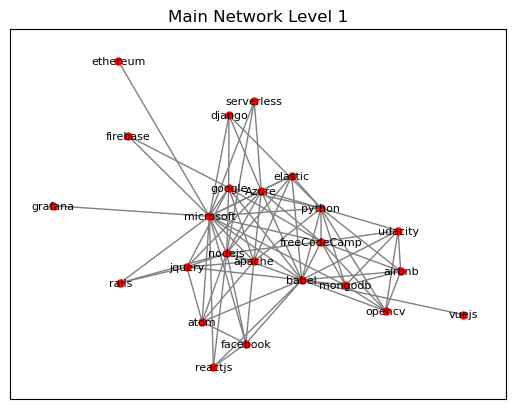

In [476]:
import networkx as nx
import matplotlib.pyplot as plt

# Assuming you have already computed the 'islands' variable using the island method

# Create a new graph to combine all islands
combined_graph = nx.Graph()

# Add edges from each island to the combined graph
for island in islands:
    combined_graph.add_edges_from(W.subgraph(island).edges())


# Create a layout for the combined graph
pos = nx.spring_layout(combined_graph)

# Plot the combined graph
plt.figure()
nx.draw_networkx(combined_graph, 
                 pos, 
                 with_labels=True, 
                 node_color='red', 
                 node_size=25, 
                 edge_color='gray',
                 font_size=8,
                )
plt.title("Main Network Level 1")

# Display the plot
plt.show()

In [448]:
combined_graph

In [487]:
greater_than6=sorted_df.loc[sorted_df['Degree']>=6]
greater_than9=sorted_df.loc[sorted_df['Degree']>=9]
greater_than14=sorted_df.loc[sorted_df['Degree']>=14]
greater_than16=sorted_df.loc[sorted_df['Degree']>=16]
greater_than6


,Organisation,Degree,Count,Closeness,Betweenness,Degree_Cent,Eigenvector
4693280,microsoft,18,3898,0.567130,0.186981,0.450,0.352507
4650702,babel,16,70,0.556818,0.173644,0.400,0.346530
1835574,nodejs,14,363,0.528017,0.067474,0.350,0.304672
4665272,python,14,119,0.502049,0.098262,0.350,0.297158
34793,google,13,802,0.502049,0.142701,0.325,0.253761
678321,apache,11,1070,0.486111,0.073070,0.275,0.246771
2024249,Azure,11,1616,0.464015,0.028991,0.275,0.267153
1825822,freeCodeCamp,10,74,0.464015,0.018431,0.250,0.261440
4643979,jquery,8,65,0.443841,0.041638,0.200,0.182627
4681831,facebook,8,107,0.443841,0.089103,0.200,0.169338


In [478]:
#degree>=  6
W1  = bipartite.projected_graph(graph, greater_than6['Organisation'])

# Apply the island method
islands = []
#value=[6,7,8,9]
visited = set()
for node in greater_than6['Organisation']:
#    if node not in visited:
    if node not in visited:
        island = nx.node_connected_component(W1, node)   
        #island = 
        islands.append(island)
        visited.update(island)
#print(island)
# Create a DataFrame for each island
dfs = []
for i, island in enumerate(islands):
    island_df = greater_than6[greater_than6['Organisation'].isin(island)]
    dfs.append(island_df)

# Print the island DataFrames
for i, island_df in enumerate(dfs):
    print(f"\nIsland {i+1}:")
    print(island_df)


Island 1:
         Organisation  Degree  Count  Closeness  Betweenness  Degree_Cent  Eigenvector
4693280     microsoft      18   3898   0.567130     0.186981        0.450     0.352507
4650702         babel      16     70   0.556818     0.173644        0.400     0.346530
1835574        nodejs      14    363   0.528017     0.067474        0.350     0.304672
4665272        python      14    119   0.502049     0.098262        0.350     0.297158
34793          google      13    802   0.502049     0.142701        0.325     0.253761
678321         apache      11   1070   0.486111     0.073070        0.275     0.246771
2024249         Azure      11   1616   0.464015     0.028991        0.275     0.267153
1825822  freeCodeCamp      10     74   0.464015     0.018431        0.250     0.261440
4643979        jquery       8     65   0.443841     0.041638        0.200     0.182627
4681831      facebook       8    107   0.443841     0.089103        0.200     0.169338
4662247       mongodb       7   

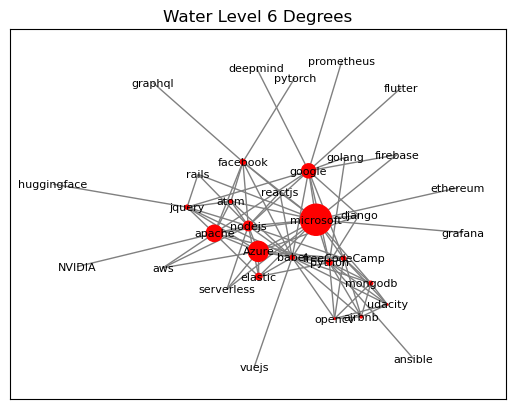

In [479]:

# Create a new graph to combine all islands
level_6_graph = nx.Graph()

# Add edges from each island to the combined graph
for island in islands:
    level_6_graph.add_edges_from(W1.subgraph(island).edges())

# Create a layout for the combined graph
pos = nx.spring_layout(level_6_graph)

# Get the count values for each node
count_values = greater_than6.groupby('Organisation')['Count'].sum()

# Determine the maximum count for scaling node sizes
max_count = np.max(count_values.values)

# Compute the node sizes based on count
node_sizes = [count_values.get(node, 0) / max_count * 500 for node in level_6_graph.nodes]

# Plot the combined graph with proportional node sizes
plt.figure()
nx.draw_networkx(level_6_graph,
                 pos,
                 with_labels=True,
                 node_color='red',
                 node_size=node_sizes,
                 edge_color='gray',
                 font_size=8,
                )
plt.title("Water Level 6 Degrees")

# Display the plot
plt.show()

In [480]:
#degree>=  9
W2  = bipartite.projected_graph(graph, greater_than9['Organisation'])

# Apply the island method
islands = []
#value=[6,7,8,9]
visited = set()
for node in greater_than9['Organisation']:
#    if node not in visited:
    if node not in visited:
        island = nx.node_connected_component(W2, node)   
        #island = 
        islands.append(island)
        visited.update(island)
#print(island)
# Create a DataFrame for each island
dfs = []
for i, island in enumerate(islands):
    island_df = greater_than9[greater_than9['Organisation'].isin(island)]
    dfs.append(island_df)

# Print the island DataFrames
for i, island_df in enumerate(dfs):
    print(f"\nIsland {i+1}:")
    print(island_df)


Island 1:
         Organisation  Degree  Count  Closeness  Betweenness  Degree_Cent  Eigenvector
4693280     microsoft      18   3898   0.567130     0.186981        0.450     0.352507
4650702         babel      16     70   0.556818     0.173644        0.400     0.346530
1835574        nodejs      14    363   0.528017     0.067474        0.350     0.304672
4665272        python      14    119   0.502049     0.098262        0.350     0.297158
34793          google      13    802   0.502049     0.142701        0.325     0.253761
678321         apache      11   1070   0.486111     0.073070        0.275     0.246771
2024249         Azure      11   1616   0.464015     0.028991        0.275     0.267153
1825822  freeCodeCamp      10     74   0.464015     0.018431        0.250     0.261440


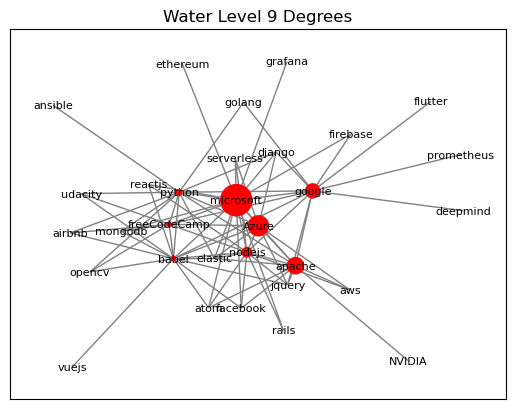

In [481]:


# Create a new graph to combine all islands
level_9_graph = nx.Graph()

# Add edges from each island to the combined graph
for island in islands:
    level_9_graph.add_edges_from(W2.subgraph(island).edges())

# Create a layout for the combined graph
pos = nx.spring_layout(level_9_graph)

# Get the count values for each node
count_values = greater_than9.groupby('Organisation')['Count'].sum()

# Determine the maximum count for scaling node sizes
max_count = np.max(count_values.values)

# Compute the node sizes based on count
node_sizes = [count_values.get(node, 0) / max_count * 500 for node in level_9_graph.nodes]

# Plot the combined graph with proportional node sizes
plt.figure()
nx.draw_networkx(level_9_graph,
                 pos,
                 with_labels=True,
                 node_color='red',
                 node_size=node_sizes,
                 edge_color='gray',
                 font_size=8,
                )
plt.title("Water Level 9 Degrees")

# Display the plot
plt.show()

In [482]:
#degree>=  14
W3  = bipartite.projected_graph(graph, greater_than14['Organisation'])

# Apply the island method
islands = []
#value=[6,7,8,9]
visited = set()
for node in greater_than14['Organisation']:
#    if node not in visited:
    if node not in visited:
        island = nx.node_connected_component(W3, node)   
        #island = 
        islands.append(island)
        visited.update(island)
#print(island)
# Create a DataFrame for each island
dfs = []
for i, island in enumerate(islands):
    island_df = greater_than14[greater_than14['Organisation'].isin(island)]
    dfs.append(island_df)

# Print the island DataFrames
for i, island_df in enumerate(dfs):
    print(f"\nIsland {i+1}:")
    print(island_df)


Island 1:
        Organisation  Degree  Count  Closeness  Betweenness  Degree_Cent  Eigenvector
4693280    microsoft      18   3898   0.567130     0.186981         0.45     0.352507
4650702        babel      16     70   0.556818     0.173644         0.40     0.346530
1835574       nodejs      14    363   0.528017     0.067474         0.35     0.304672
4665272       python      14    119   0.502049     0.098262         0.35     0.297158


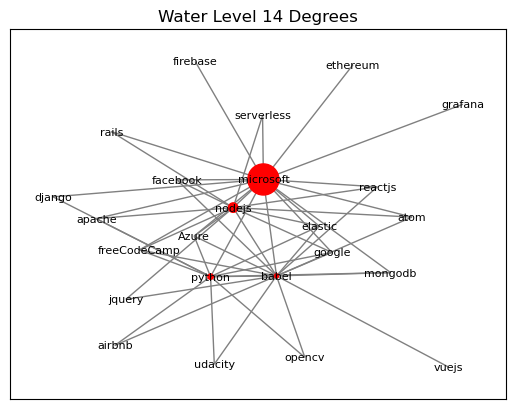

In [474]:

# Create a new graph to combine all islands
level_14_graph = nx.Graph()

# Add edges from each island to the combined graph
for island in islands:
    level_14_graph.add_edges_from(W3.subgraph(island).edges())

# Create a layout for the combined graph
pos = nx.spring_layout(level_14_graph)

# Get the count values for each node
count_values = greater_than14.groupby('Organisation')['Count'].sum()

# Determine the maximum count for scaling node sizes
max_count = np.max(count_values.values)

# Compute the node sizes based on count
node_sizes = [count_values.get(node, 0) / max_count * 500 for node in level_14_graph.nodes]

# Plot the combined graph with proportional node sizes
plt.figure()
nx.draw_networkx(level_14_graph,
                 pos,
                 with_labels=True,
                 node_color='red',
                 node_size=node_sizes,
                 edge_color='gray',
                 font_size=8,
                )
plt.title("Water Level 14 Degrees")

# Display the plot
plt.show()

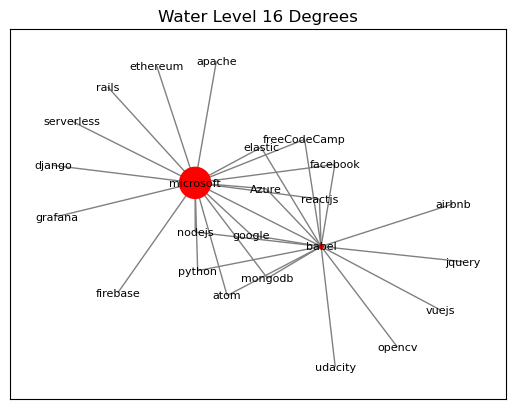

In [486]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from networkx.algorithms import bipartite

# degree >= 16
W4 = bipartite.projected_graph(graph, greater_than16['Organisation'])

# Apply the island method
islands = []
visited = set()
for node in greater_than16['Organisation']:
    if node not in visited:
        island = nx.node_connected_component(W4, node)
        islands.append(island)
        visited.update(island)

# Create a DataFrame for each island
dfs = []
for i, island in enumerate(islands):
    island_df = greater_than16[greater_than16['Organisation'].isin(island)]
    dfs.append(island_df)

# Create a new graph to combine all islands
level_16_graph = nx.Graph()

# Add edges from each island to the combined graph
for island in islands:
    level_16_graph.add_edges_from(W4.subgraph(island).edges())

# Create a layout for the combined graph
pos = nx.spring_layout(level_16_graph)

# Get the count values for each node
count_values = greater_than16.groupby('Organisation')['Count'].sum()

# Determine the maximum count for scaling node sizes
max_count = np.max(count_values.values)

# Compute the node sizes based on count
node_sizes = [count_values.get(node, 0) / max_count * 500 for node in level_16_graph.nodes]

# Plot the combined graph with proportional node sizes
plt.figure()
nx.draw_networkx(level_16_graph,
                 pos,
                 with_labels=True,
                 node_color='red',
                 node_size=node_sizes,
                 edge_color='gray',
                 font_size=8,
                )
plt.title("Water Level 16 Degrees")

# Display the plot
plt.show()